# What determines the rental price for a property in Aberdeen?

## A description of the problem and a discussion of the background. 

**Introduction/ Business Problem**

I have been renting in Aberdeen, Scotland for nearly 9 years and one thing I could never fully comprehend was the rental price. I would find 2 properties in close proximity to each other, and which to me seemed to be fairly similar, but with very different asking prices. 

It got me thinking: 'What actually determines the rental price for a property in Aberdeen?'. Is it the location? Maybe the square footage or EPC band? What about it's proximity to amenities such as shops, cafes and restaurants? There is surprisingly less data publicly available on this matter than compared to that accessible to home buyers.

**Target audience**

The conclusions of this mini-research are meant to give my fellow renters some insight into rental prices in Aberdeen and what most impacts them. This in turn is meant to aid them into deciding on what to focus in their searches.

## A description of the data and how it will be used to solve the problem.

In [1]:
%%html
<style>
table {float:left}
</style>

There are two sets of data that will be used, namely:
1. Property data from a properties website (ASPC), and
2. Amenities data from a location data provider (Foursquare).

The latter will be leveraged during the analysis section later on.

### ASPC property data explanation

The property data was scraped from Aberdeen Solicitors Property Centre's (ASPC) website: https://www.aspc.co.uk.

The below table contains a brief description of the data pulled:

| Column name | Description |
|:-------------|-------------|
| First_line  | First line of address of the property|
| Second_line  | Second line of address of the property|
| City  | City in which the property is located |
| Postcode  | Postcode of the property|
| Bedrooms  | Number of bedrooms|
| Bathrooms  | Number of bathrooms|
| Lounges  | Number of lounges (public rooms)|
| Price  | Monthly asking price|
| Square_ft  | Square footage of the property|
| Property_type  | Flat, house, etc|
| Description  | Full description of the property|
| Latitude  | Latitude of the property|
| Longitude  | Longitude of the property|
| Council_tax_band  | Council tax band for 2020-2021|
| EPC_band  | Energy Performance Certificate band|
| Garden  | Access to a garden|
| Parking  | Access to parking|

**a) Clarification on Council tax bands**

Council tax is a local tax paid by homeowners and renters and is used by the city councils to fund their services each year (Further details can be found here: https://www.aberdeencity.gov.uk/services/council-tax/how-your-council-tax-spent).

**Current bands for 2020-2021:**

| Council tax band | Total annual charge |
|:-------------|-------------|
| Band A  | £1216.94 |
| Band B  | £1419.76 |
| Band C  | £1622.59 |
| Band D  | £1825.41 |
| Band E  | £2357.31 |
| Band F  | £2885.38 |
| Band G  | £3444.06 |
| Band H  | £4270.61 |

**Why is it important in this analysis?**

This is an additional monthly expense for those who rent and **will impact their monthly outgoings**.

Generally, unless you're making bank, you will be looking to rent a property between bands A and C.

**1.b. Clarification on EPC bands**

EPCs, Energy Performance Certificates, are all about the energy efficiency of a property and its impact on the environment. They are mandatory by law in Scotland.

![alt text](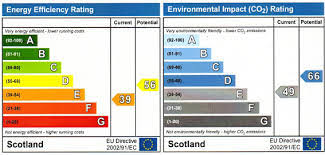 "Logo Title Text 1")

**Why is it important in this analysis?**

Similar to the council tax bands they run from A to G with the bands A to C being considered energy efficient.

Again, similar to council tax this **will impact a renter's monthly outgoings**. The less energy efficient a property is (for example, old electricals) the higher the running costs and the higher the energy bill to be paid by the renter.

# Let's get coding!

In [2]:
import json
import requests

url = 'https://www.aspc.co.uk/search/?PrimaryPropertyType=Rent&SortBy=PublishedDesc&LastUpdated=AddedAnytime&SearchTerm=&PropertyType=Residential&PriceMin=&PriceMax=&Bathrooms=&OrMoreBathrooms=true&Bedrooms=&OrMoreBedrooms=true&HasCentralHeating=false&HasGarage=false&HasDoubleGarage=false&HasGarden=false&IsNewBuild=false&IsDevelopment=false&IsParkingAvailable=false&IsPartExchangeConsidered=false&PublicRooms=&OrMorePublicRooms=true&IsHmoLicense=false&IsAllowPets=false&IsAllowSmoking=false&IsFullyFurnished=false&IsPartFurnished=false&IsUnfurnished=false&ExcludeUnderOffer=false&IncludeClosedProperties=true&ClosedDatesSearch=14&MapSearchType=EDITED&ResultView=LIST&ResultMode=NONE&AreaZoom=13&AreaCenter[lat]=57.14955426557916&AreaCenter[lng]=-2.0927401123046785&EditedZoom=13&EditedCenter[lat]=57.14955426557916&EditedCenter[lng]=-2.0927401123046785'
api_url = 'https://api.aspc.co.uk/Property/GetProperties?{}&Sort=PublishedDesc&Page=1&PageSize=639'

params = url.split('?')[-1]
data = requests.get(api_url.format(params)).json()

print(json.dumps(data, indent=4))

# print some data to screen:
#for property_ in data:
    #print(property_['Location']['AddressLine1'])
    #print(property_['Location']['LineTwoLocation'])
   # print(property_['Location']['City'])
    #print(property_['Location']['Postcode'])
    #print(property_['Bedrooms'])
    #print(property_['Bathrooms'])
    #print(property_['PublicRooms'])
    #print(property_['Price'])
   # print(property_['FloorArea'])
   # print(property_['PropertyIconKey'])
   # print(property_['CategorisationDescription'])
   # print(property_['Location']['Spatial']['Geography']['WellKnownText'])
    #print('-' * 80)

[
    {
        "Id": 389709,
        "OfficePropertyId": 332990,
        "PropertyType": 2,
        "Bedrooms": 2,
        "Bathrooms": 2,
        "PublicRooms": 1,
        "CategorisationDescription": "Fully furnished 2 Bdrm 1st flr Executive flat. Hall. Lounge/Dining kitch on open plan. Utility rm. 2 Bdrms 1 with ensuite. Bathrm (CT band - E). Parking. No pets. No smokers. Rent around \u00a3695 p.m Immed entry. Viewing contact solicitors. Landlord reg: 508804/100/14031. (EPC band - B).",
        "Price": 695.0,
        "PriceType": 11,
        "RentalPricePeriod": 1,
        "UnderOffer": false,
        "FormattedClosingDate": "",
        "Location": {
            "AddressLine1": "124e North Deeside Road",
            "LineOneLocation": "124e North Deeside Road",
            "LineTwoLocation": "Peterculter, Aberdeen, AB14\u00a00RS",
            "OrganisationName": "",
            "Locality": "Peterculter",
            "City": "Aberdeen",
            "County": "",
            "Countr

In [3]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

In [4]:
# creating the initial pandas dataframe
column_names=['First_line','Second_line','City','Postcode','Bedrooms','Bathrooms','Lounges','Price','Square_ft','Property_type','Description','Coordinates']
properties = pd.DataFrame(columns=column_names)
properties

,First_line,Second_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Description,Coordinates


In [5]:
# pulling the required info for each column
for property_ in data:
    first_line=property_['Location']['AddressLine1']
    second_line=property_['Location']['LineTwoLocation']
    city=property_['Location']['City']
    postcode=property_['Location']['Postcode']
    bedrooms=property_['Bedrooms']
    bathrooms=property_['Bathrooms']
    lounges=property_['PublicRooms']
    price=property_['Price']
    square_ft=property_['FloorArea']
    property_type=property_['PropertyIconKey']
    description=property_['CategorisationDescription']
    coordinates=property_['Location']['Spatial']['Geography']['WellKnownText']
    
# amending the existing dataframe with required info
    properties=properties.append({'First_line': first_line,
                                 'Second_line':second_line,
                                 'City': city,
                                 'Postcode': postcode,
                                 'Bedrooms': bedrooms,
                                 'Bathrooms': bathrooms,
                                 'Lounges': lounges,
                                 'Price': price,
                                 'Square_ft': square_ft,
                                 'Property_type': property_type,
                                 'Description': description,
                                 'Coordinates': coordinates}, ignore_index=True)
print('done')

done


In [6]:
properties.head()

,First_line,Second_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Description,Coordinates
0,124e North Deeside Road,"Peterculter, Aberdeen, AB14 0RS",Aberdeen,AB14 0RS,2,2,1,695.0,0.0,FLAT,Fully furnished 2 Bdrm 1st flr Executive flat....,POINT (-2.26365390000001 57.09612)
1,"36 Dempsey Court, Queens Lane North","Aberdeen, AB15 4DY",Aberdeen,AB15 4DY,2,2,1,1100.0,86.0,FLAT,Fully furnished 2 Bdrm 1st flr Executive flat....,POINT (-2.12968580000006 57.1434534)
2,"Basement Flat Left, 164 Crown Street","Aberdeen, AB11 6JB",Aberdeen,AB11 6JB,2,1,1,520.0,0.0,FLAT,Fully furnished 2 Bdrm Basement Flat. Hall. Lo...,POINT (-2.10101199999997 57.1403439)
3,"Flat G, 54 Charlotte Street","Aberdeen, AB25 1LT",Aberdeen,AB25 1LT,2,1,1,525.0,56.0,FLAT,Fully furnished 2 Bdrm Top flr Flat. Hall. Lou...,POINT (-2.10447253967288 57.1513310928801)
4,19B Whitehouse Street,"Aberdeen, AB10 1QJ",Aberdeen,AB10 1QJ,2,1,1,550.0,74.0,FLAT,Fully furnished 2 Bdrm 1st flr Flat. Hall. Lou...,POINT (-2.111434 57.146558)


In [7]:
properties.shape

(634, 12)

In [8]:
import re  #very useful for defining search patterns

# creating the Council tax, EPC band, Garden and Parking columns by extracting the data from the Description column
# note to self: (?i) case insensitive modifier

properties['Council_tax_band'] = properties['Description'].str.extract(r'(?i)\(((?:CT)[^()*&?%]+)\)', expand=False)
properties['EPC_band'] = properties['Description'].str.extract(r'(?i)\(((?:EPC)[^()*&?%]+)\)', expand=False)
properties['Garden']= properties.Description.str.extract(r'\b(Garden)\b', expand=False)
properties['Parking']= properties.Description.str.extract(r'\b(Parking)\b', expand=False)

#sorting out the latitude and longitude of the properties
properties['Coordinates']=properties.Coordinates.str.strip('POINT (')
properties['Coordinates']=properties.Coordinates.str.strip(')')
properties['Longitude'], properties['Latitude']= properties['Coordinates'].str.split(' ',1).str

#dropping columns no longer required
properties.drop(['Description'], axis=1, inplace=True)
properties.drop(['Second_line'], axis=1, inplace=True)
properties.drop(['Coordinates'], axis=1, inplace=True)

properties.head()

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
0,124e North Deeside Road,Aberdeen,AB14 0RS,2,2,1,695.0,0.0,FLAT,CT band - E,EPC band - B,NaN,Parking,-2.26365390000001,57.09612
1,"36 Dempsey Court, Queens Lane North",Aberdeen,AB15 4DY,2,2,1,1100.0,86.0,FLAT,CT Band - F,EPC band - C,NaN,Parking,-2.12968580000006,57.1434534
2,"Basement Flat Left, 164 Crown Street",Aberdeen,AB11 6JB,2,1,1,520.0,0.0,FLAT,CT Band - B,EPC band - C,Garden,NaN,-2.10101199999997,57.1403439
3,"Flat G, 54 Charlotte Street",Aberdeen,AB25 1LT,2,1,1,525.0,56.0,FLAT,CT band - D,EPC band - C,NaN,Parking,-2.10447253967288,57.1513310928801
4,19B Whitehouse Street,Aberdeen,AB10 1QJ,2,1,1,550.0,74.0,FLAT,CT band - D,EPC band - E,NaN,NaN,-2.111434,57.146558


In [10]:
#one-hot encoding for Property_type, Garden and Parking columns
for column in ['Property_type', 'Garden', 'Parking', 'Council_tax_band', 'EPC_band']:
    dummies = pd.get_dummies(properties[column])
    properties[dummies.columns] = dummies

#dropping Property_type column as no longer required
properties.drop(['Property_type'], axis=1, inplace=True)
properties.drop(['Council_tax_band'], axis=1, inplace=True)
properties.drop(['EPC_band'], axis=1, inplace=True)

properties.head()

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Garden,Parking,...,CT band -F,CT band -TBC,CT band A,CT band B,EPC band - B,EPC band - C,EPC band - D,EPC band - E,EPC band - F,EPC band - G
0,124e North Deeside Road,Aberdeen,AB14 0RS,2,2,1,695.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,"36 Dempsey Court, Queens Lane North",Aberdeen,AB15 4DY,2,2,1,1100.0,86.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,"Basement Flat Left, 164 Crown Street",Aberdeen,AB11 6JB,2,1,1,520.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,"Flat G, 54 Charlotte Street",Aberdeen,AB25 1LT,2,1,1,525.0,56.0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,19B Whitehouse Street,Aberdeen,AB10 1QJ,2,1,1,550.0,74.0,0,0,...,0,0,0,0,0,0,0,1,0,0
